In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 11

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,191 (4.65 KB)

 Trainable params: 1,191 (4.65 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0939 - loss: 2.4838
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.0945 - loss: 2.4772 - val_accuracy: 0.2322 - val_loss: 2.3216
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1527 - loss: 2.3514 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1524 - loss: 2.3501 - val_accuracy: 0.2664 - val_loss: 2.2415
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1714 - loss: 2.2453 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1718 - loss: 2.2444 - val_accuracy: 0.2863 - val_loss: 2.1612
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2101 - loss: 2.1821 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5410 - loss: 1.2058 - val_accuracy: 0.7920 - val_loss: 0.9279
Epoch 25/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 1.2275
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5435 - loss: 1.2129 - val_accuracy: 0.7906 - val_loss: 0.9049
Epoch 26/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5234 - loss: 1.1806
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5390 - loss: 1.2014 - val_accuracy: 0.7877 - val_loss: 0.8837
Epoch 27/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6094 - loss: 1.1359
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5757 - loss: 1.1747 - val_accuracy: 0.7863 - val_loss: 0.8717
Epoch 28/1000
 1/17 ━━━━━━━━━━━━━━━━━━

Epoch 48/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6250 - loss: 0.9927
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6254 - loss: 1.0050 - val_accuracy: 0.8462 - val_loss: 0.6303
Epoch 49/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5859 - loss: 1.0338
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6111 - loss: 0.9789 - val_accuracy: 0.8504 - val_loss: 0.6366
Epoch 50/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6172 - loss: 1.0416
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6336 - loss: 0.9915 - val_accuracy: 0.8419 - val_loss: 0.6338
Epoch 51/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6875 - loss: 0.8853
Epoch 51: saving model to model/keypoint_classifier/keypoint_class

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6631 - loss: 0.8948 - val_accuracy: 0.8575 - val_loss: 0.5281
Epoch 72/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6875 - loss: 0.7610
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6678 - loss: 0.8682 - val_accuracy: 0.8590 - val_loss: 0.5304
Epoch 73/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7266 - loss: 0.9116
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6881 - loss: 0.8821 - val_accuracy: 0.8661 - val_loss: 0.5228
Epoch 74/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6484 - loss: 0.9219
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6527 - loss: 0.8904 - val_accuracy: 0.8575 - val_loss: 0.5193
Epoch 75/1000
 1/17 ━━━━━━━━━━━━━━━━━━

Epoch 95/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7031 - loss: 0.8315
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6882 - loss: 0.8602 - val_accuracy: 0.8689 - val_loss: 0.4726
Epoch 96/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7109 - loss: 0.8399
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7041 - loss: 0.8196 - val_accuracy: 0.8618 - val_loss: 0.4716
Epoch 97/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7031 - loss: 0.8591
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6779 - loss: 0.8678 - val_accuracy: 0.8704 - val_loss: 0.4743
Epoch 98/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7266 - loss: 0.7961
Epoch 98: saving model to model/keypoint_classifier/keypoint_class

 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7188 - loss: 0.8073
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7232 - loss: 0.7757 - val_accuracy: 0.8789 - val_loss: 0.4320
Epoch 119/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6719 - loss: 0.9051
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7128 - loss: 0.7879 - val_accuracy: 0.8661 - val_loss: 0.4361
Epoch 120/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7578 - loss: 0.6695
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7217 - loss: 0.7397 - val_accuracy: 0.8775 - val_loss: 0.4285
Epoch 121/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6016 - loss: 0.9608
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.k

 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7266 - loss: 0.7552
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7231 - loss: 0.7384 - val_accuracy: 0.8718 - val_loss: 0.4110
Epoch 142/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6719 - loss: 0.9581
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6923 - loss: 0.8216 - val_accuracy: 0.8860 - val_loss: 0.4121
Epoch 143/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7422 - loss: 0.7572
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7180 - loss: 0.7649 - val_accuracy: 0.8761 - val_loss: 0.4159
Epoch 144/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7344 - loss: 0.7693
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.k

 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7422 - loss: 0.9339
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7313 - loss: 0.7617 - val_accuracy: 0.8846 - val_loss: 0.3896
Epoch 165/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6953 - loss: 0.8393
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7234 - loss: 0.7390 - val_accuracy: 0.8832 - val_loss: 0.3829
Epoch 166/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6641 - loss: 0.7770
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7143 - loss: 0.7142 - val_accuracy: 0.8846 - val_loss: 0.3793
Epoch 167/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7266 - loss: 0.7400
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.k

 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7734 - loss: 0.6676
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7495 - loss: 0.7134 - val_accuracy: 0.8860 - val_loss: 0.3742
Epoch 188/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7344 - loss: 0.6897
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7294 - loss: 0.7179 - val_accuracy: 0.8832 - val_loss: 0.3783
Epoch 189/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7422 - loss: 0.6963
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7535 - loss: 0.6782 - val_accuracy: 0.8803 - val_loss: 0.3740
Epoch 190/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7812 - loss: 0.6109
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.k

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7422 - loss: 0.6814 
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7416 - loss: 0.6834 - val_accuracy: 0.8860 - val_loss: 0.3611
Epoch 211/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7031 - loss: 0.7317
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7379 - loss: 0.7060 - val_accuracy: 0.8889 - val_loss: 0.3605
Epoch 212/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7578 - loss: 0.6773
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7286 - loss: 0.7237 - val_accuracy: 0.8917 - val_loss: 0.3585
Epoch 213/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8438 - loss: 0.5789
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.k

 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8047 - loss: 0.5772
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7464 - loss: 0.6882 - val_accuracy: 0.8875 - val_loss: 0.3534
Epoch 234/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7344 - loss: 0.7470
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7528 - loss: 0.6880 - val_accuracy: 0.8917 - val_loss: 0.3554
Epoch 235/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7422 - loss: 0.6422
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7349 - loss: 0.7073 - val_accuracy: 0.8917 - val_loss: 0.3503
Epoch 236/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8125 - loss: 0.5265
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.k

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.6879 
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7463 - loss: 0.6875 - val_accuracy: 0.8903 - val_loss: 0.3513
Epoch 257/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7344 - loss: 0.7634
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7522 - loss: 0.6871 - val_accuracy: 0.8932 - val_loss: 0.3478
Epoch 258/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6953 - loss: 0.7876
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7472 - loss: 0.6882 - val_accuracy: 0.8932 - val_loss: 0.3447
Epoch 259/1000
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7500 - loss: 0.6259
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.k

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8799 - loss: 0.3763 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[3.2319166e-04 5.1566944e-03 2.4356445e-02 5.6060887e-04 3.8304576e-03
 7.5579044e-07 1.0190486e-06 1.2935003e-06 5.4111853e-02 1.1456177e-02
 9.0020150e-01]
10


# Confusion matrix

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


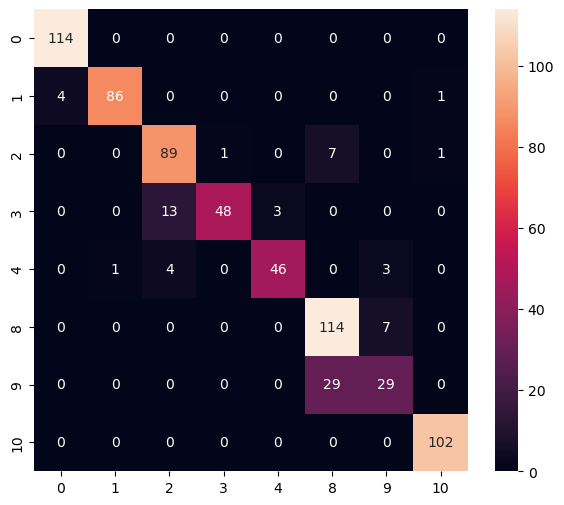

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       114
           1       0.99      0.95      0.97        91
           2       0.84      0.91      0.87        98
           3       0.98      0.75      0.85        64
           4       0.94      0.85      0.89        54
           8       0.76      0.94      0.84       121
           9       0.74      0.50      0.60        58
          10       0.98      1.00      0.99       102

    accuracy                           0.89       702
   macro avg       0.90      0.86      0.87       702
weighted avg       0.90      0.89      0.89       702



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\thakk\AppData\Local\Temp\tmppir5v794\assets


INFO:tensorflow:Assets written to: C:\Users\thakk\AppData\Local\Temp\tmppir5v794\assets


Saved artifact at 'C:\Users\thakk\AppData\Local\Temp\tmppir5v794'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  1549310690512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1549309011408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1549311070224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1549311066576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1549311072912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1549311071568: TensorSpec(shape=(), dtype=tf.resource, name=None)


6844

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.2319155e-04 5.1566903e-03 2.4356408e-02 5.6060840e-04 3.8304580e-03
 7.5579118e-07 1.0190487e-06 1.2935005e-06 5.4111782e-02 1.1456156e-02
 9.0020162e-01]
10
